In [1]:
####### Approach Explanation #######
'''
The assignment was as follows 

Analyse the dataset and do EDA(Exploratory Data Analysis) – 4 Marks (I have done this)

Plotting of various graphs & correlations – 4 Marks (I have done this)

Model Building using Linear Regression – 12 Marks [3 Marks for each SGD (I have done this) , Mini Batch(I have done this),
Gradient Descent (I have done this) , Normal SK-Learn library (I have done this)]

Calculating the R squared, RMSE, and MSE for the model - 4 Marks (I have done this)


I have done the following in this notebook as per the ask for the mini project

1) Done EDA and provided my analysis
2) Coded my own implementation of gradient descent
3) Coded my own implementation of Stochastic gradient descent
4) Coded my own implementation of mini batch gradient descent
5) Coded my own implementation of MSE and RSquare
6) Coded my own implementation of normal linear regression using equations
7) Used Sk learn library for stochastic gradient descent
8) Used SK learn library with my own implementation tweak for mini batch gradient descent
9) Used stock RSquared and MSE function


'''


########Load Libraries#######

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler # using standard scaler as data for most features is normally distributed
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime

%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
####################################
#           EDA Starts             #
####################################

######## Load Data ########

BASE_PATH = './'
os.listdir(BASE_PATH)

df_load_features = pd.read_csv(os.path.join(BASE_PATH, 'Insurance_data.csv'))


######## print quality of data ########

print("Head data \n",df_load_features.head())
print("Tail data \n",df_load_features.tail())
print("describe data \n",df_load_features.describe())
print("Null values present:  ",df_load_features.isnull().values.any())

######## Drop na columns #########

df_load_features = df_load_features.dropna()

Head data 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Tail data 
       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
describe data 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      

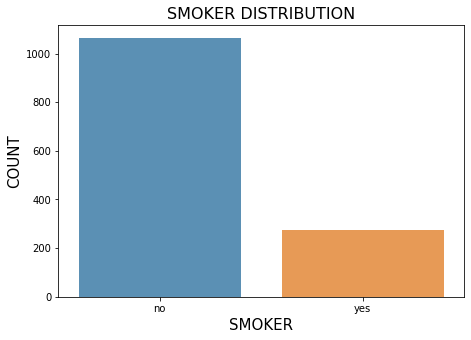

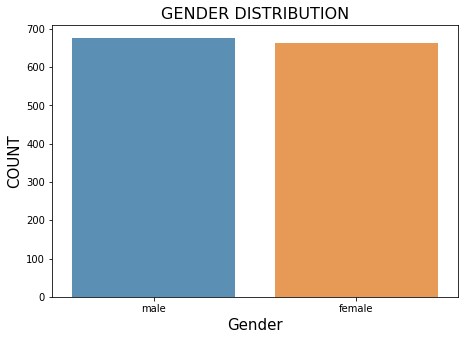

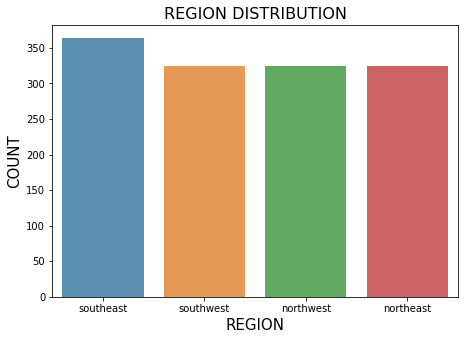

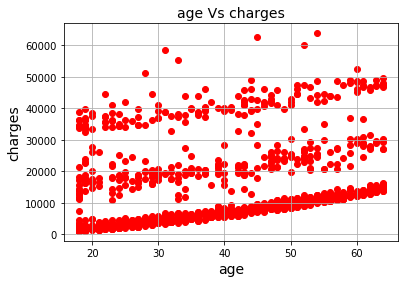

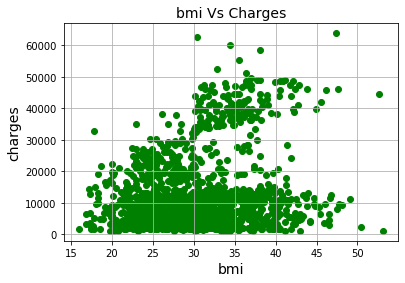

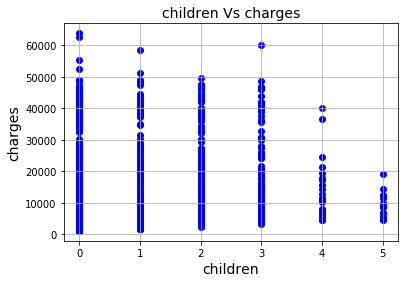

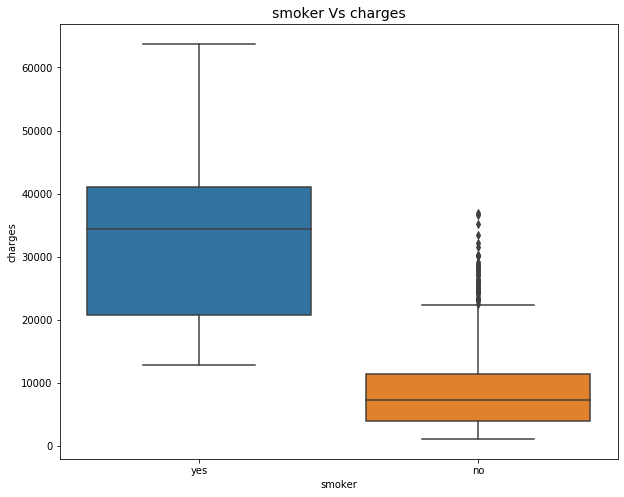

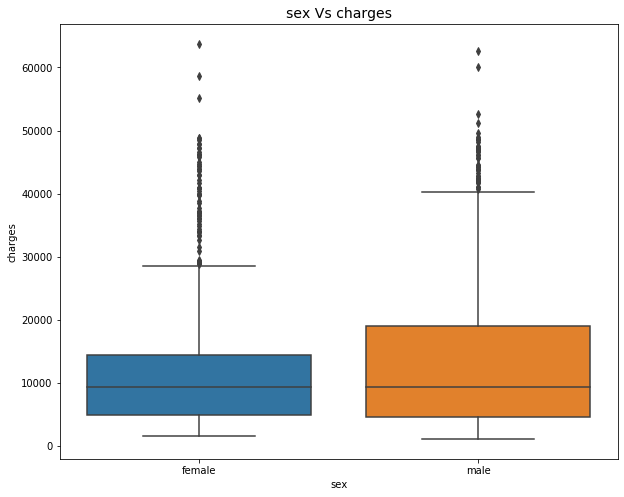

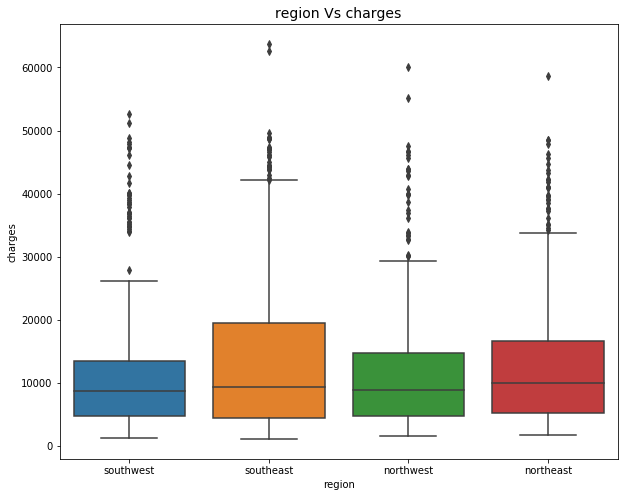

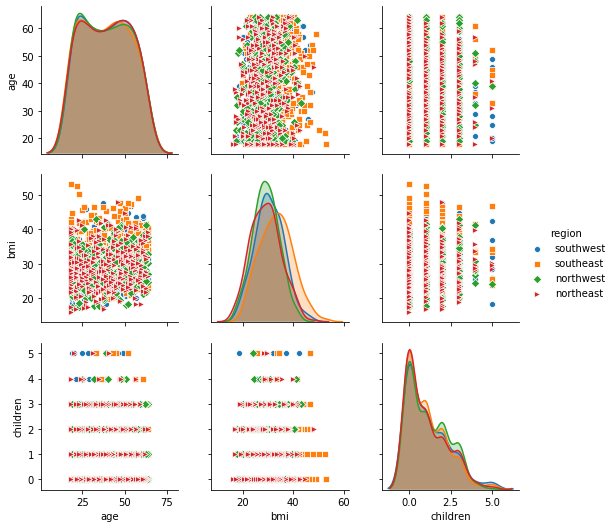

In [3]:
######## smoker distribution ########
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title('SMOKER DISTRIBUTION', fontsize=16)
x = (df_load_features['smoker']).value_counts()
sn.barplot(x.index, x.values, alpha=0.8)
plt.xlabel('SMOKER', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.show()

######## Gender distribution ########
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title('GENDER DISTRIBUTION', fontsize=16)
x = (df_load_features['sex']).value_counts()
sn.barplot(x.index, x.values, alpha=0.8)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.show()

######## Region distribution ########
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title('REGION DISTRIBUTION', fontsize=16)
x = (df_load_features['region']).value_counts()
sn.barplot(x.index, x.values, alpha=0.8)
plt.xlabel('REGION', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.show()

######## Checking for linear relation between age , bmi & children AND charges ########

plt.scatter(df_load_features['age'], df_load_features['charges'], color='red')
plt.title('age Vs charges', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_load_features['bmi'], df_load_features['charges'], color='green')
plt.title('bmi Vs Charges', fontsize=14)
plt.xlabel('bmi', fontsize=14)
plt.ylabel('charges', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_load_features['children'], df_load_features['charges'], color='blue')
plt.title('children Vs charges', fontsize=14)
plt.xlabel('children', fontsize=14)
plt.ylabel('charges', fontsize=14)
plt.grid(True)
plt.show()


######## Box plot to find out outliers for categorical variables like smoker , sex & region ########

plt.figure(figsize=(10, 8))
plt.title('smoker Vs charges', fontsize=14)
sn.boxplot(x="smoker",y="charges",data=df_load_features)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('sex Vs charges', fontsize=14)
sn.boxplot(x="sex",y="charges",data=df_load_features)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('region Vs charges', fontsize=14)
sn.boxplot(x="region",y="charges",data=df_load_features)
plt.show()

######## Scatter Plot distribution of region against smoker and gender ########
tmp_df = df_load_features.loc[:, ['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
sn.pairplot(tmp_df, hue ="region", markers=["o", "s", "D",">"]) 




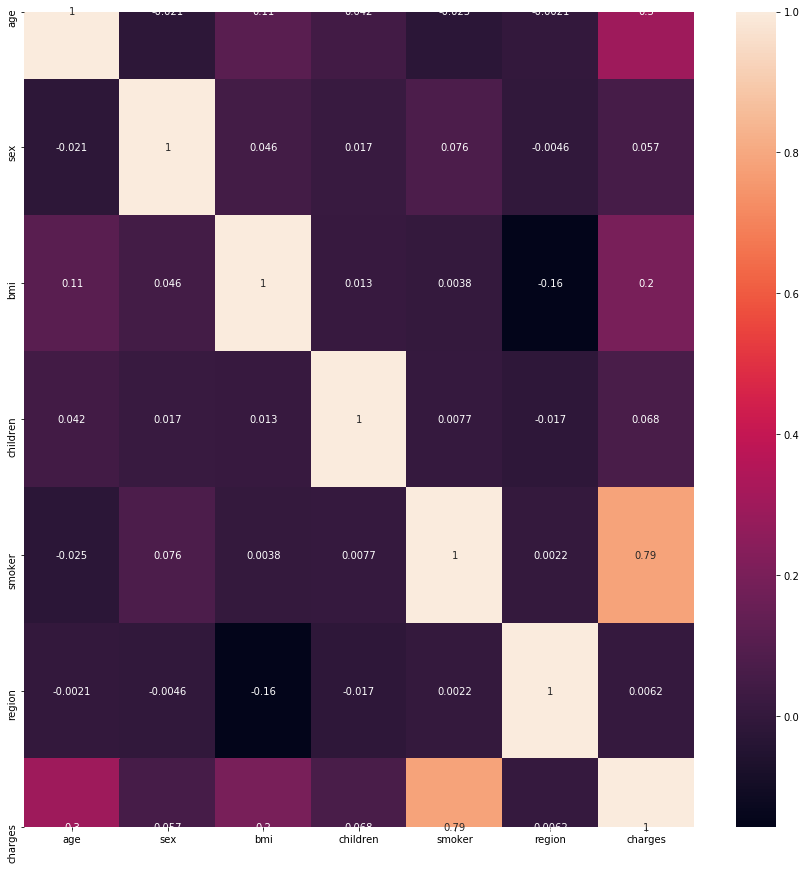

In [4]:
######## Preprocess Data ########
def preprocess(df):
    df.loc[:, 'sex'] = df.loc[:, 'sex'].map({'female': 0, 'male': 1})
    df.loc[:, 'smoker'] = df.loc[:, 'smoker'].map({'no': 0, 'yes': 1})
    df.loc[:, 'region'] = df.loc[:, 'region'].map({'southwest': 0, 'southeast': 1,'northwest': 2, 'northeast': 3})
    return df

df_load_features = preprocess(df_load_features)
df_load_features

######## Check feature correlation #########

tmp_df = df_load_features.loc[:, ['age', 'sex', 'bmi', 'children', 'smoker', 'region','charges']]

plt.figure(figsize=(15, 15))
sn.heatmap(tmp_df.corr(), annot=True)
plt.show()

In [5]:
'''
EDA Analysis 

1) Low correlation between the features shows that every feature is significant and can be used for
   predicting the charges 
   
2) We see a larger distribution of non smokers than smokers , male and females are near equally 
   distributed

3) South east people seem to have higher BMIs

4) people with less than equal to 3 children seem to be evenly distrinuted across all ages

5) North east people seem to be at most 3 children on an average basis

6) North east and north west people seem to have lesser BMI on an average than others . Also their 
   BMI is evenly distributed across different ages 
   
7) Charges has higher correlation with smoker , bmi & age hence selecting those features

8) From the scatter plot , it is proved that linear relation exists 

9) From the box plot we can derive that median of sex vs charges for male and female is nearly the same with some outliers .
   Also the median for diffrent region vs charges is also the same with outliers . Also people who ar smokers , have a high
   median than people who arent smokers 

10) We dont have any null values & rows 

'''

'\nEDA Analysis \n\n1) Low correlation between the features shows that every feature is significant and can be used for\n   predicting the charges \n   \n2) We see a larger distribution of non smokers than smokers , male and females are near equally \n   distributed\n\n3) South east people seem to have higher BMIs\n\n4) people with less than equal to 3 children seem to be evenly distrinuted across all ages\n\n5) North east people seem to be at most 3 children on an average basis\n\n6) North east and north west people seem to have lesser BMI on an average than others . Also their \n   BMI is evenly distributed across different ages \n   \n7) Charges has higher correlation with smoker , bmi & age hence selecting those features\n\n8) From the scatter plot , it is proved that linear relation exists \n\n9) From the box plot we can derive that median of sex vs charges for male and female is nearly the same with some outliers .\n   Also the median for diffrent region vs charges is also the sa

epochs: 100%|█████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 354.23it/s]


RMSE of the GD model: 5729.954036335644 , MSE of the GD model: 32832373.258519135 , RSquared of the GD model: 0.7936757303313073


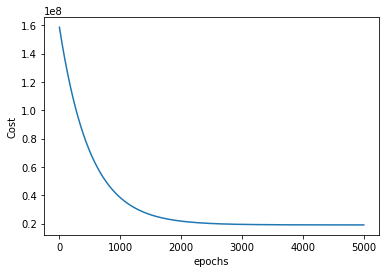

In [6]:
##################################################################################
#           Multiple linear regression using gradient descent Starts             #
##################################################################################

'''
I will be using the following intuition to build this algorithm 

h(x1,x2,x3,x4,x5,x6) = theta0 + theta1*x1 + theta2*x2 + theta3*x3 + theta4*x4 + theta5*x5 + theta6*x6

where x1 = age , x2 = sex , x3 = bmi , x4 = children , x5 = smoker , x6 = region

In terms of tensors , it can be denoted as below

h(x) = [theta0 theta1 theta2 theta3 theta4 theta5 theta6] * [1]
                                                            [x1]
                                                            [x2]
                                                            [x3]
                                                            [x4]
                                                            [x5]
                                                            [x6]
                                                            
We have to create the appropriate cost/loss function & find out the error and minimize it 

cost j(theta) = 1/2m*sum(h(theta)(i) - y(i))^2 , here cost is MSE

theta(0) = theta(0) - alpha(1/m*sum((h(theta)(i)-y(i))*x(i)))

similarly other thetas can be calculated

code implementation as below

'''
####### scale the data #######
scaler = StandardScaler()

df_load_charges = df_load_features.loc[:, ['charges']]
#df_load_features = df_load_features.loc[:, ['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
df_load_features = df_load_features.loc[:, ['age', 'bmi',  'smoker']]
df_load_features = np.array(df_load_features)
df_load_charges = np.array(df_load_charges)
df_load_features = scaler.fit_transform(df_load_features)


####### create the function for y bar  #######
def createybar(theta, X, n):
    ybar = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        ybar[i] = float(np.matmul(theta, X[i]))
    ybar = ybar.reshape(X.shape[0])
    return ybar

####### create the fucntion for gradient descent  #######
def GD(theta, alpha, epochs, ybar, X, y, n):
    cost = np.ones(epochs)
    for i in tqdm(range(0,epochs),desc ="epochs"):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(ybar-y) 
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((ybar-y) * X.transpose()[j])
        ybar = createybar(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(ybar - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

####### create the fucntion for calling the multiple linear regression  #######
def multiple_linear_regression(X, y, alpha, epochs):
    n = X.shape[1]
    extra_column_1 = np.ones((X.shape[0],1))
    X = np.concatenate((extra_column_1, X), axis = 1) #concatenate an extra column for theta0
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # ybar calculation....
    ybar = createybar(theta, X, n)
    theta, cost = GD(theta,alpha,epochs,ybar,X,y,n)
    return theta, cost

####### Initialize the learning rate and epochs  #######

learning_rate = 0.001 # This works well across different algorithms 
epochs = 5000 # I checked first with 100000 iters and the cost seemed to flatten out at 5000

####### Split the data set into train and test ########
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features, 
                                                df_load_charges.reshape(df_load_charges.shape[0],)
                                                , test_size = 0.2, random_state = 0)

####### Calculate the theta and the cost ########

theta, cost = multiple_linear_regression(xTrain, yTrain,learning_rate, epochs)


######## Plot the epocs vs error graph ########

cost = list(cost)
n_iterations = [x for x in range(1,epochs+1)]
plt.plot(n_iterations, cost)
plt.xlabel('epochs')
plt.ylabel('Cost')

######## get predictions for test split  #########

features = xTest.shape[1]
extra_column_1 = np.ones((xTest.shape[0],1))
xTest = np.concatenate((extra_column_1, xTest), axis = 1)
ypred = createybar(theta, xTest, features )

######## Calculate MSE , RMSE & R-SQUARED #########

def mse_and_rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error),mean_error

def RSquared(actual, predicted):
    
    differencesModel = predicted-actual
    sumofdifferencesModel = 0
    for i in differencesModel:
        sumofdifferencesModel = sumofdifferencesModel + (i*i)
    
    ymean = np.full(actual.shape[0],[np.mean(actual)])
    differencesMean = ymean - actual
    sumofdifferencesMean = 0
    for i in differencesMean:
        sumofdifferencesMean = sumofdifferencesMean + (i*i)
    
    rsquared = (sumofdifferencesMean - sumofdifferencesModel)/sumofdifferencesMean
    return rsquared
    

rmse , mse = mse_and_rmse_metric(yTest , ypred)
rsquared = RSquared(yTest , ypred)
print("RMSE of the GD model: {} , MSE of the GD model: {} , RSquared of the GD model: {}".format(
                                                                      rmse,mse,rsquared))


total length 1204


epochs: 100%|██████████████████████████████████████████████████████████████████████| 5000/5000 [02:20<00:00, 35.54it/s]


RMSE of the SGD model: 10799.610214381464 , MSE of the SGD model: 116631580.78257245 , RSquared of the SGD model: 0.3985069205352128


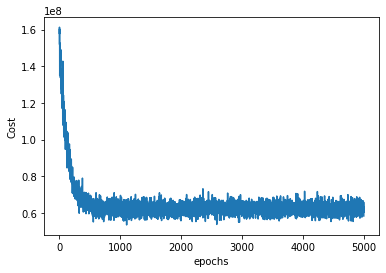

In [7]:
#############################################################################################
#           Multiple linear regression using Stochastic gradient descent Starts             #
#############################################################################################


'''
In stochastic gradient descent we try to run the calculations against chosen samples instead of 
the whole dataset . We will follow that strategy below

code implementation as below

'''

####### create the function for y bar  #######

def createybarSGD(theta, X, n):
    theta = theta.reshape(1,n+1)
    ybar = np.matmul(theta, X)
    return ybar


####### create the fucntion for stochastic gradient descent  #######
def SGD(theta, alpha, epochs, X, y, n):
    cost_np = np.ones(epochs)
    totalLength = len(y)
    print("total length", totalLength)
    for i in tqdm(range(0,epochs),desc ="epochs"):
        cost = 0.0
        for j in range(totalLength):
            rand_row = np.random.randint(0,totalLength)
            chosenXrow = X[rand_row,:]
            chosenY = y[rand_row]
            ybar = createybarSGD(theta, chosenXrow, n)
            theta = theta - (alpha/X.shape[0]) * sum((ybar-chosenY) * chosenXrow.transpose())  
            ybar = createybarSGD(theta, chosenXrow, n)
            cost += (1/totalLength) * 0.5 * sum((ybar - chosenY)**2)
        cost_np[i] = cost
    theta = theta.reshape(1,n+1)
    return theta, cost_np

####### create the fucntion for calling the multiple linear regression for SGD #######
def multiple_linear_regression_SGD(X, y, alpha, epochs):
    n = X.shape[1]
    extra_column_1 = np.ones((X.shape[0],1))
    X = np.concatenate((extra_column_1, X), axis = 1) #concatenate an extra column for theta0
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = SGD(theta,alpha,epochs,X,y,n)
    return theta, cost

####### Initialize the learning rate and epochs  #######

learning_rate = 0.001 # This works well across different algorithms 
epochs = 5000 # I checked first with 100000 iters and the cost seemed to flatten out at 5000

####### Split the data set into train and test ########
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features, 
                                                df_load_charges.reshape(df_load_charges.shape[0],)
                                                , test_size = 0.1, random_state = 0)

####### Calculate the theta and the cost ########

theta, cost = multiple_linear_regression_SGD(xTrain, yTrain,learning_rate, epochs)


######## Plot the epocs vs error graph ########

cost = list(cost)
n_iterations = [x for x in range(1,epochs+1)]
plt.plot(n_iterations, cost)
plt.xlabel('epochs')
plt.ylabel('Cost')

######## get predictions for test split  #########

features = xTest.shape[1]
extra_column_1 = np.ones((xTest.shape[0],1))
xTest = np.concatenate((extra_column_1, xTest), axis = 1)
ypred = createybar(theta, xTest, features )

######## Calculate MSE , RMSE & R-SQUARED #########

rmse , mse = mse_and_rmse_metric(yTest , ypred)
rsquared = RSquared(yTest , ypred)
print("RMSE of the SGD model: {} , MSE of the SGD model: {} , RSquared of the SGD model: {}".format(
                                                                      rmse,mse,rsquared))
###### Not getting optimal performance from the coded SGD model- RSquared is around 40 #####

epochs: 100%|█████████████████████████████████████████████████████████████████████| 5000/5000 [00:48<00:00, 103.95it/s]


RMSE of the Mini Batch GD model: 5948.018224227837 , MSE of the Mini Batch GD model: 35378920.795746475 , RSquared of the Mini Batch GD model: 0.817543620048798


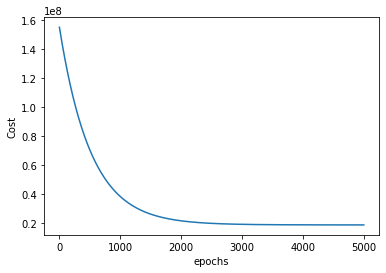

In [8]:
#############################################################################################
#           Multiple linear regression using mini batch gradient descent Starts             #
#############################################################################################


####### create the function for y bar  #######
def createybarMBGD(theta, X, n):
    ybar = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        ybar[i] = float(np.matmul(theta, X[i]))
    ybar = ybar.reshape(X.shape[0])
    return ybar

####### create the fucntion for mini batch gradient descent  #######
def MBGD(theta, alpha, epochs, X, y, ybar, n, batchSize):
    cost_np = np.ones(epochs)
    totalLength = len(y)
    for i in tqdm(range(0,epochs),desc ="epochs"):
        cost = 0.0
        for j in range(0,totalLength,batchSize):
            chosenXrows = X[j:j+batchSize]
            chosenYs = y[j:j+batchSize]
            ybar=createybarMBGD(theta, chosenXrows, n)
            theta[0] = theta[0] - (alpha/X.shape[0]) * sum(ybar-chosenYs) 
            for k in range(1,n+1):
                theta[k] = theta[k] - (alpha/X.shape[0]) * sum((ybar-chosenYs) * chosenXrows.transpose()[k])
            ybar = createybarMBGD(theta, chosenXrows, n)
            cost += (1/X.shape[0]) * 0.5 * sum(np.square(ybar - chosenYs))
        cost_np[i] = cost
    theta = theta.reshape(1,n+1)
    return theta, cost_np


####### create the fucntion for calling the multiple linear regression  #######
def multiple_linear_regressionMBGD(X, y, alpha, epochs,batchSize):
    n = X.shape[1]
    extra_column_1 = np.ones((X.shape[0],1))
    X = np.concatenate((extra_column_1, X), axis = 1) #concatenate an extra column for theta0
    theta = np.zeros(n+1)
    ybar = createybar(theta, X, n)
    theta, cost = MBGD(theta,alpha,epochs,X,y,ybar,n,batchSize)
    return theta, cost

####### Initialize the learning rate  epochs & batch size  #######

learning_rate = 0.001 # This works well across different algorithms 
epochs = 5000 # I checked first with 100000 iters and the cost seemed to flatten out at 5000
batch_size = 10 # This batch size works well and doesnt consume a lot of resources as well

####### Split the data set into train and test ########
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features, 
                                                df_load_charges.reshape(df_load_charges.shape[0],)
                                                , test_size = 0.1, random_state = 0)

####### Calculate the theta and the cost ########

theta, cost = multiple_linear_regressionMBGD(xTrain, yTrain,learning_rate, epochs, batch_size)


######## Plot the epocs vs error graph ########

cost = list(cost)
n_iterations = [x for x in range(1,epochs+1)]
plt.plot(n_iterations, cost)
plt.xlabel('epochs')
plt.ylabel('Cost')

######## get predictions for test split  #########

features = xTest.shape[1]
extra_column_1 = np.ones((xTest.shape[0],1))
xTest = np.concatenate((extra_column_1, xTest), axis = 1)
ypred = createybar(theta, xTest, features )

######## Calculate MSE , RMSE & R-SQUARED #########


rmse , mse = mse_and_rmse_metric(yTest , ypred)
rsquared = RSquared(yTest , ypred)
print("RMSE of the Mini Batch GD model: {} , MSE of the Mini Batch GD model: {} , RSquared of the Mini Batch GD model: {}".format(
                                                                      rmse,mse,rsquared))

###### coded MBGD model gives better results than coded SGD & GD but is not as fast as Gradient Descent #####

In [9]:
#############################################################################################
#                    Multiple Linear Regression using Normal Equation(coded)                #
#############################################################################################

'''
Using the formula 

Theta = Inverse of (Xtranspose DOT X) DOT Xtranspose DOT y

'''

from sklearn.metrics import r2_score


####### Split the data set into train and test ########
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features, 
                                                df_load_charges.reshape(df_load_charges.shape[0],1)
                                                , test_size = 0.1, random_state = 0)

extra_column_1 = np.ones((xTrain.shape[0],1))
xTrain = np.concatenate((extra_column_1, xTrain), axis = 1) #concatenate an extra column for theta0
theta = np.linalg.inv(xTrain.transpose().dot(xTrain)).dot(xTrain.transpose()).dot(yTrain) # normal equation


extra_column_1 = np.ones((xTest.shape[0],1))
xTest = np.concatenate((extra_column_1, xTest), axis = 1)
y_pred = xTest.dot(theta)  # making predictions

rmse , mse = mse_and_rmse_metric(yTest , y_pred)
rsquared = r2_score(yTest , y_pred)
print("RMSE of the multiple linear regression using normal equation model: {} , MSE of the multiple linear regression using normal equation  model: {} , RSquared of the multiple linear regression using normal equation  model: {}".format(
                                                                      rmse,mse,rsquared))


RMSE of the multiple linear regression using normal equation model: 5914.840414470897 , MSE of the multiple linear regression using normal equation  model: [34985337.12865824] , RSquared of the multiple linear regression using normal equation  model: 0.8195734120687248


In [10]:
#############################################################################################
#                   Multiple linear regression(SGD) using Sklearn library Starts            #
#############################################################################################

####### import the necessary libraries  #######
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


####### Split the data set into train and test ########
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features, 
                                                df_load_charges.reshape(df_load_charges.shape[0],)
                                                , test_size = 0.1, random_state = 0)

####### Initialize the regressor with adaptive learning rate & for 1000 iterations & fit it to training data########

sgdr = SGDRegressor(learning_rate='adaptive',max_iter=1000)
sgdr.fit(xTrain, yTrain)


score = sgdr.score(xTest, yTest) #score the model against the test data to get R2

ypred = sgdr.predict(xTest) #Get the predictions for validation data

mse = mean_squared_error(yTest, ypred) #Get the MSE 

print("RMSE of the SKLearn SGD model: {} , MSE of the SKLearn SGD model: {} , RSquared of the SKLearn SGD model: {}".format(
                                                                      mse**(1/2.0),mse,score))


RMSE of the SKLearn SGD model: 5914.507506919125 , MSE of the SKLearn SGD model: 34981399.049402684 , RSquared of the SKLearn SGD model: 0.8195937215543951


In [11]:
#############################################################################################
#           Multiple linear regression(Mini batch GD) using Sklearn library Starts          #
#############################################################################################


####### Split the data set into train and test ########
xTrain, xTest, yTrain, yTest = train_test_split(df_load_features, 
                                                df_load_charges.reshape(df_load_charges.shape[0],)
                                                , test_size = 0.1, random_state = 0)


batchSize  = 10 #Evaluating performance with same batch size as the coded minibatch algorithm

####### Initialize the regressor with adaptive learning rate & for 1000 iterations & fit it to training data########
sgdr = SGDRegressor(learning_rate='adaptive',max_iter=1000)

####### Simulate minibatch GD using the partial fit function########
for j in range(0,xTrain.shape[0],batchSize):
    chosenXrows = xTrain[j:j+batchSize]
    chosenYs = yTrain[j:j+batchSize]
    sgdr.partial_fit(chosenXrows, chosenYs)

score = sgdr.score(xTest, yTest) #score the model against the test data to get R2

ypred = sgdr.predict(xTest)  #Get the predictions for validation data

mse = mean_squared_error(yTest, ypred)

print("RMSE of the SKLearn minibatch model: {} , MSE of the SKLearn minibatch model: {} , RSquared of the SKLearn minibatch model: {}".format(
                                                                      mse**(1/2.0),mse,score))

RMSE of the SKLearn minibatch model: 5730.732926388723 , MSE of the SKLearn minibatch model: 32841299.873595856 , RSquared of the SKLearn minibatch model: 0.8306306537041517


In [12]:
#############################################################################################
#                                    Overall Run time                                       #
#############################################################################################

endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sun, 20 Dec 2020 07:13:50 +0000
Run ended at :  Sun, 20 Dec 2020 07:17:20 +0000
